In [1]:
# import sys
# import os
# sys.path.append(os.path.abspath('..'))  # geht eine Ebene nach oben im Dateisystem

In [ ]:
! pip install matplotlib
! pip install numpy
! pip install opencv-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.moravec import moravec_corner_detector
#from corner_detectors.harris import harris_corner_detector

# für saubere Darstellung in Jupyter
%matplotlib inline

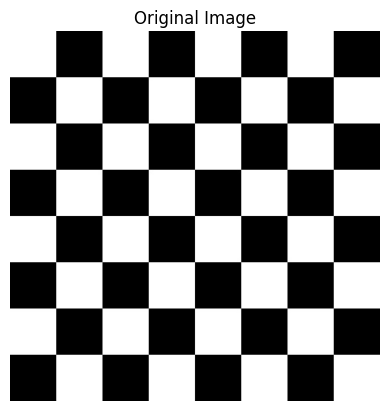

In [13]:
# Lade ein Bild in Graustufen
img_path = '/Users/thomasschultze/Downloads/OpenCV_Git_clone/OpenCV/images/chess.jpg'  # Pfad zum Bild anpassen, falls nötig
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img_gray is None:
    raise FileNotFoundError(f"Bild konnte nicht geladen werden: {img_path}")

plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [14]:
# Moravec anwenden
corner_response = moravec_corner_detector(img_gray, window_size=3, threshold=10000)

# Ecken extrahieren (alle Positionen mit Wert > 0)
corner_coords = np.argwhere(corner_response > 0)

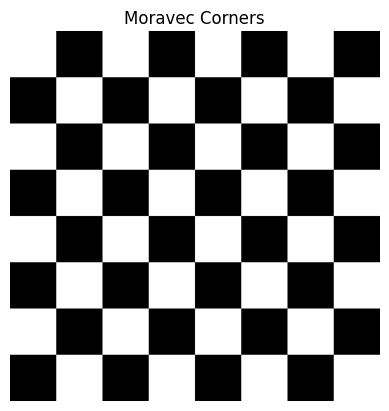

In [15]:
# Farbbild zum Anzeigen erzeugen
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

# Ecken markieren
for y, x in corner_coords:
    cv2.circle(img_vis, (x, y), 2, (0, 255, 0), -1)  # kleine grüne Punkte

plt.imshow(cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB))
plt.title('Moravec Corners')
plt.axis('off')
plt.show()